In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, GRU
from sklearn.model_selection import train_test_split

In [14]:
# Load the data
file_path = 'BTC.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  5160 non-null   object 
 1   date    5160 non-null   object 
 2   open    5160 non-null   float64
 3   high    5160 non-null   float64
 4   low     5160 non-null   float64
 5   close   5160 non-null   float64
dtypes: float64(4), object(2)
memory usage: 242.0+ KB


(  ticker        date     open     high      low    close
 0    BTC  2010-07-17  0.04951  0.04951  0.04951  0.04951
 1    BTC  2010-07-18  0.04951  0.08585  0.04951  0.08584
 2    BTC  2010-07-19  0.08584  0.09307  0.07723  0.08080
 3    BTC  2010-07-20  0.08080  0.08181  0.07426  0.07474
 4    BTC  2010-07-21  0.07474  0.07921  0.06634  0.07921,
 None)

In [13]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select the necessary columns for modeling
prices = data[['open', 'high', 'low', 'close']].values

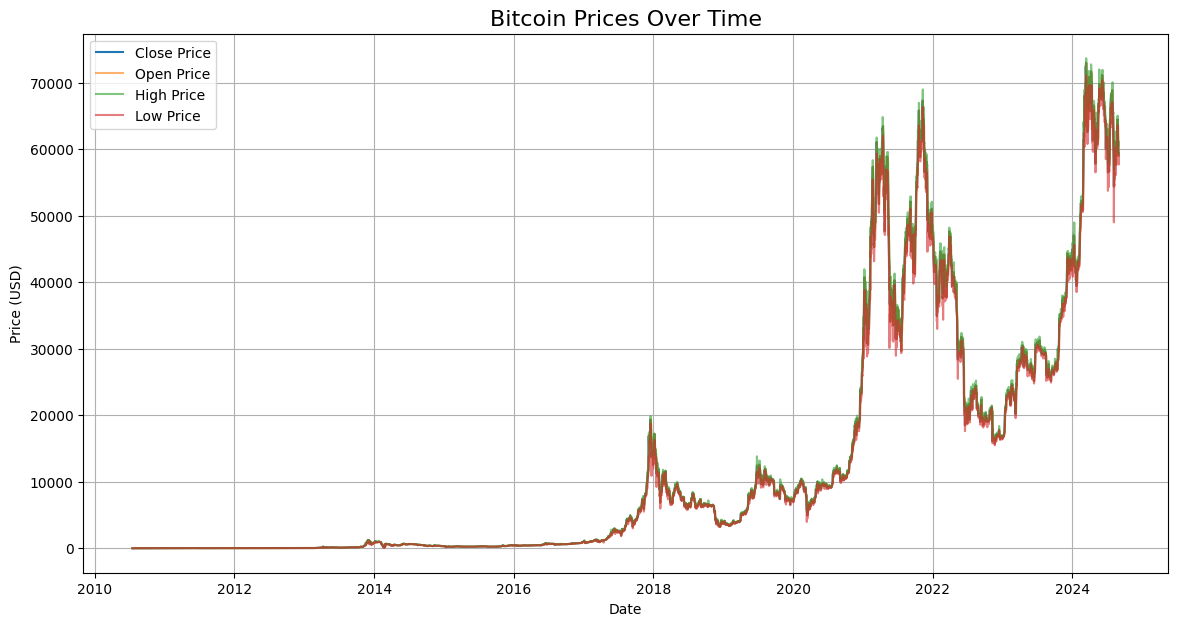

In [15]:
import matplotlib.pyplot as plt
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

data['date'] = pd.to_datetime(data['date'])

data.set_index('date', inplace=True)

# Visualize the Open, High, Low, and Close prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.plot(data['open'], label='Open Price', alpha=0.6)
plt.plot(data['high'], label='High Price', alpha=0.6)
plt.plot(data['low'], label='Low Price', alpha=0.6)
plt.title('Bitcoin Prices Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length][-1])  # Predicting 'close' price
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [19]:
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(GRU(units=50))
gru_model.add(Dense(25))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the GRU model
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0114
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.4847e-04
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1.3786e-04
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.2721e-04
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.1013e-04
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 9.1834e-05
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.0768e-04
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.1385e-04
Epoch 9/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 1.3816e-04
Epoch 10/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 9.3219e-05


In [21]:
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.5565e-05 - val_loss: 3.7243e-04
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1.1078e-05 - val_loss: 3.3365e-04
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.2028e-05 - val_loss: 3.1442e-04
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.2975e-05 - val_loss: 3.2079e-04
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.1116e-05 - val_loss: 3.1531e-04
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.0739e-05 - val_loss: 3.1324e-04
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1.4882e-05 - val_loss: 3.2985e-04
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 1.1221e-05 - val_loss: 3.0610e-04
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.2274e-05 - val_loss: 3.2846e-04
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1.1700e-05 - val_loss: 3.2896e-04
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1.1097e-0

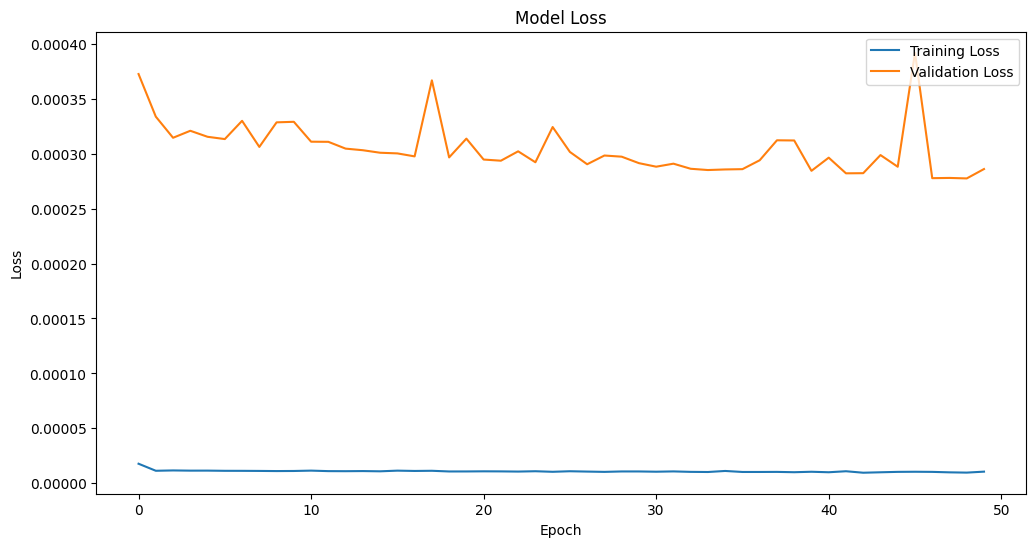

In [22]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [23]:
gru_loss = gru_model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5953e-04


In [24]:
gru_predictions = gru_model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [25]:
cnn_predictions = scaler.inverse_transform(np.concatenate((np.zeros((gru_predictions.shape[0], 3)), gru_predictions), axis=1))[:, -1]
print(f'CNN Predictions: {cnn_predictions}')

CNN Predictions: [64301.17532139 60265.61653375 59217.17520233 ... 58527.35884925
 59783.77526061 58733.48936085]
